In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
'''
Classification basis
prior: product_id, order_id
products: product_id, aisle_id
prders: order_id, user_id
aisles: aisle_id, aisle
''' 
prior = pd.read_csv("order_products__prior.csv")
prior.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [3]:
products = pd.read_csv("products.csv")
products.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [4]:
orders = pd.read_csv("orders.csv")
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [5]:
aisles = pd.read_csv("aisles.csv")
aisles.head(3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [6]:
# Combine four tables into one table (user-item category)
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
meg = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [7]:
meg.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [8]:
# crosstable(special categorize tool)
cross = pd.crosstab(meg['user_id'], meg['aisle'])

In [9]:
cross.head(5)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [10]:
# PCA Analysis, 主成分分析，降维
pca = PCA(n_components=0.9)

In [11]:
data = pca.fit_transform(cross)

In [12]:
data

array([[-2.42156587e+01,  2.42942720e+00, -2.46636975e+00, ...,
         6.86800336e-01,  1.69439402e+00, -2.34323022e+00],
       [ 6.46320806e+00,  3.67511165e+01,  8.38255336e+00, ...,
         4.12121252e+00,  2.44689740e+00, -4.28348478e+00],
       [-7.99030162e+00,  2.40438257e+00, -1.10300641e+01, ...,
         1.77534453e+00, -4.44194030e-01,  7.86665571e-01],
       ...,
       [ 8.61143331e+00,  7.70129866e+00,  7.95240226e+00, ...,
        -2.74252456e+00,  1.07112531e+00, -6.31925661e-02],
       [ 8.40862199e+01,  2.04187340e+01,  8.05410372e+00, ...,
         7.27554259e-01,  3.51339470e+00, -1.79079914e+01],
       [-1.39534562e+01,  6.64621821e+00, -5.23030367e+00, ...,
         8.25329076e-01,  1.38230701e+00, -2.41942061e+00]])

In [13]:
data.shape

(206209, 27)

In [17]:
# 把样本数量减少
x = data[:1000]
x.shape

(1000, 27)

In [19]:
# 假设一共将用户分为4个类别
km = KMeans(n_clusters=4)

In [20]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
predict = km.predict(x)

In [22]:
predict

array([2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 3, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,

In [24]:
# 显示聚类的结果
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

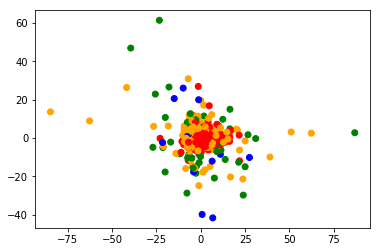

In [25]:
# 建立4个颜色的列表
color = ['orange', 'green', 'red', 'blue']
# 遍历预测列表，给每个样本分配颜色
colr = [color[i] for i in predict]
plt.scatter(x[:, 8], x[:, 16], color=colr)
plt.show()

In [27]:
# 评判聚类效果，轮廓系数
silhouette_score(x, predict)

0.45737261424146425